# Kategorik Değişken Analizi

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)

In [2]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df["embarked"].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [4]:
df["sex"].unique()

array(['male', 'female'], dtype=object)

In [5]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [26]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [25]:
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int","float"]]

In [24]:
num_but_cat

['survived', 'pclass', 'sibsp', 'parch']

In [23]:
cat_but_car = [col for col in df.columns if df[col].nunique()>20 and str(df[col].dtypes) in ["category", "object"]]

In [21]:
cat_cols = cat_cols + num_but_cat

In [27]:
cat_cols = [col for col in cat_cols if col not in cat_but_car]
cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [30]:
df[cat_cols]

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,male,S,Third,man,True,NaN,Southampton,no,False
1,female,C,First,woman,False,C,Cherbourg,yes,False
2,female,S,Third,woman,False,NaN,Southampton,yes,True
3,female,S,First,woman,False,C,Southampton,yes,False
4,male,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...
886,male,S,Second,man,True,NaN,Southampton,no,True
887,female,S,First,woman,False,B,Southampton,yes,True
888,female,S,Third,woman,False,NaN,Southampton,no,False
889,male,C,First,man,True,C,Cherbourg,yes,True


In [31]:
df[cat_cols].nunique()

sex            2
embarked       3
class          3
who            3
adult_male     2
deck           7
embark_town    3
alive          2
alone          2
dtype: int64

- value counts
- 100 * value counts / len(df)

In [32]:
def cat_summary(dataframe, col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio":100*dataframe[col_name].value_counts()/len(dataframe)}))

In [33]:
cat_summary(df, "sex")

        sex      Ratio
sex                   
male    577  64.758698
female  314  35.241302


In [34]:
for col in cat_cols:
    cat_summary(df, col)

        sex      Ratio
sex                   
male    577  64.758698
female  314  35.241302
          embarked      Ratio
embarked                     
S              644  72.278339
C              168  18.855219
Q               77   8.641975
        class      Ratio
class                   
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
       who      Ratio
who                  
man    537  60.269360
woman  271  30.415264
child   83   9.315376
            adult_male     Ratio
adult_male                      
True               537  60.26936
False              354  39.73064
      deck     Ratio
deck                
C       59  6.621773
B       47  5.274972
D       33  3.703704
E       32  3.591470
A       15  1.683502
F       13  1.459035
G        4  0.448934
             embark_town      Ratio
embark_town                        
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
       alive      Rati

In [37]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio":100*dataframe[col_name].value_counts()/len(dataframe)}))
    print("############################################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

        sex      Ratio
sex                   
male    577  64.758698
female  314  35.241302
############################################################


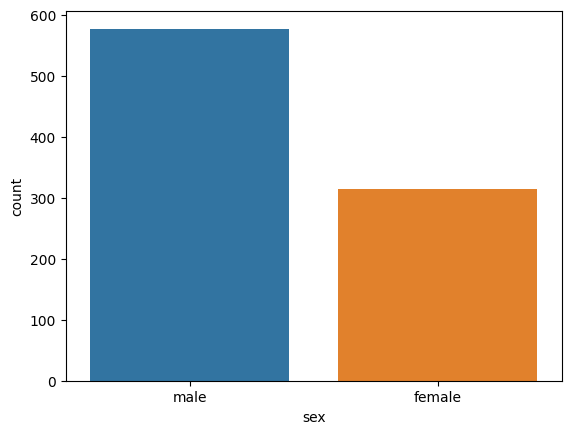

          embarked      Ratio
embarked                     
S              644  72.278339
C              168  18.855219
Q               77   8.641975
############################################################


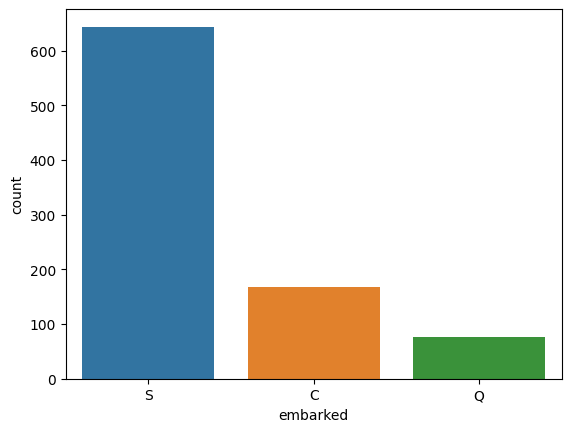

        class      Ratio
class                   
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
############################################################


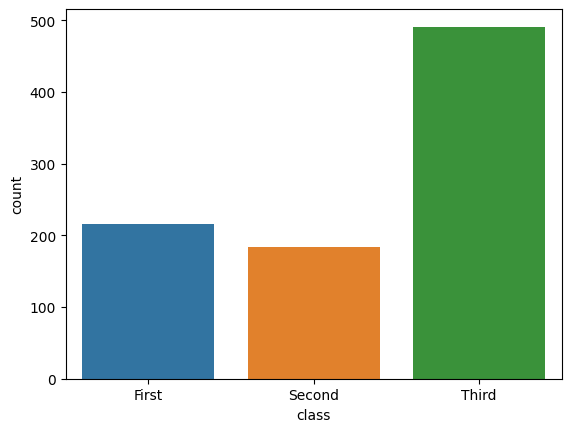

       who      Ratio
who                  
man    537  60.269360
woman  271  30.415264
child   83   9.315376
############################################################


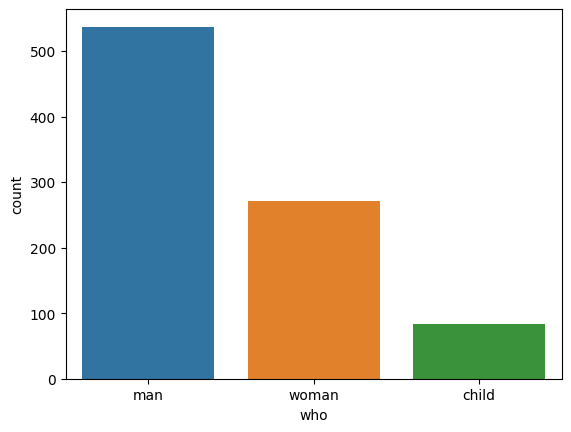

Bool Tipi
      deck     Ratio
deck                
C       59  6.621773
B       47  5.274972
D       33  3.703704
E       32  3.591470
A       15  1.683502
F       13  1.459035
G        4  0.448934
############################################################


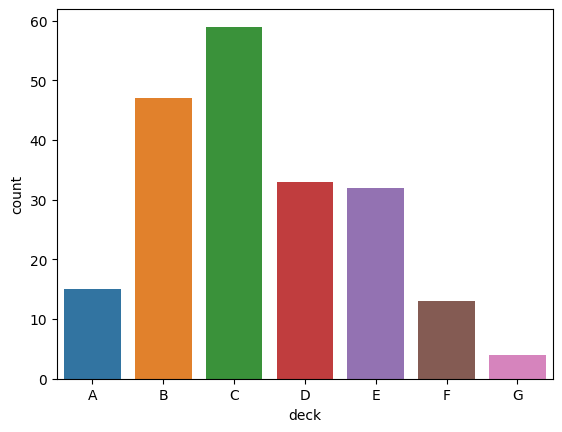

             embark_town      Ratio
embark_town                        
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
############################################################


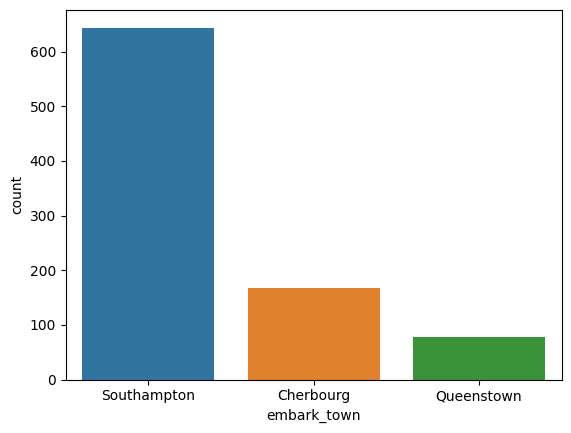

       alive      Ratio
alive                  
no       549  61.616162
yes      342  38.383838
############################################################


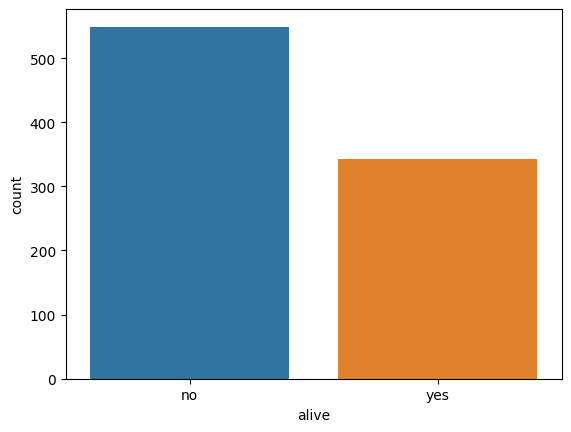

Bool Tipi


In [39]:
for col in cat_cols:
    if df[col].dtypes =="bool":
        print("Bool Tipi")
    else:
        cat_summary(df, col, plot=True) 

In [40]:
df["adult_male"].head()

0     True
1    False
2    False
3    False
4     True
Name: adult_male, dtype: bool

In [43]:
df["adult_male"].astype(int)

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: adult_male, Length: 891, dtype: int64

        sex      Ratio
sex                   
male    577  64.758698
female  314  35.241302
############################################################


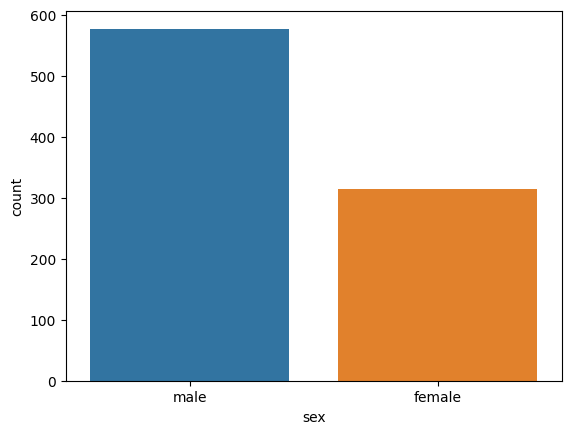

          embarked      Ratio
embarked                     
S              644  72.278339
C              168  18.855219
Q               77   8.641975
############################################################


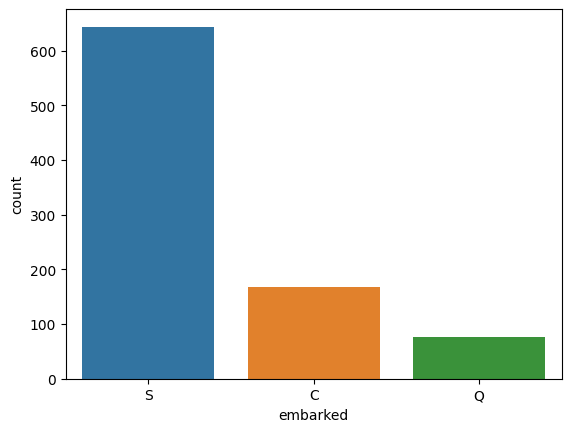

        class      Ratio
class                   
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
############################################################


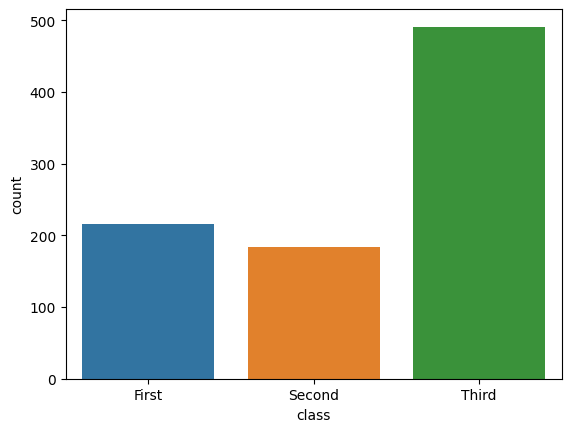

       who      Ratio
who                  
man    537  60.269360
woman  271  30.415264
child   83   9.315376
############################################################


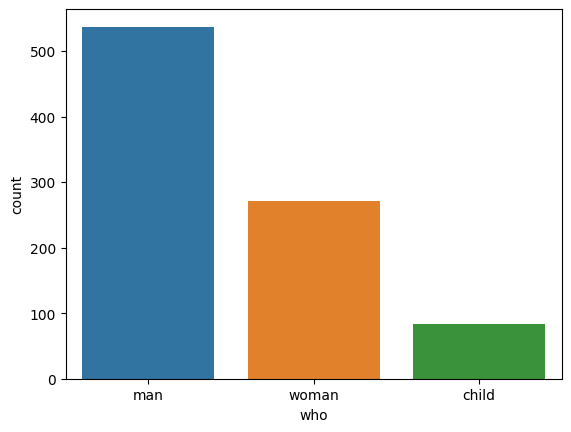

            adult_male     Ratio
adult_male                      
1                  537  60.26936
0                  354  39.73064
############################################################


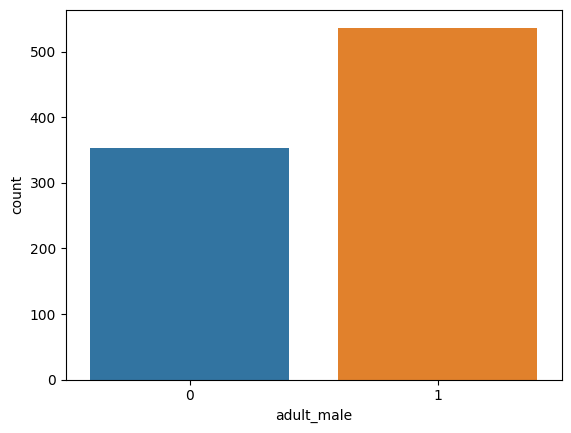

      deck     Ratio
deck                
C       59  6.621773
B       47  5.274972
D       33  3.703704
E       32  3.591470
A       15  1.683502
F       13  1.459035
G        4  0.448934
############################################################


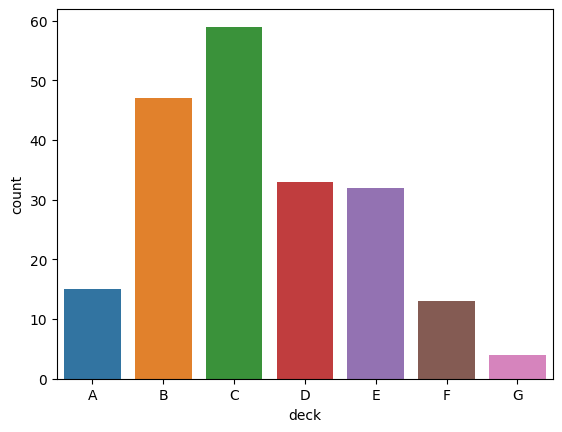

             embark_town      Ratio
embark_town                        
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
############################################################


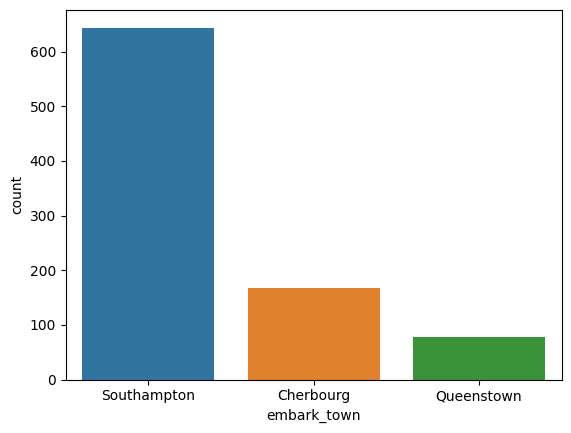

       alive      Ratio
alive                  
no       549  61.616162
yes      342  38.383838
############################################################


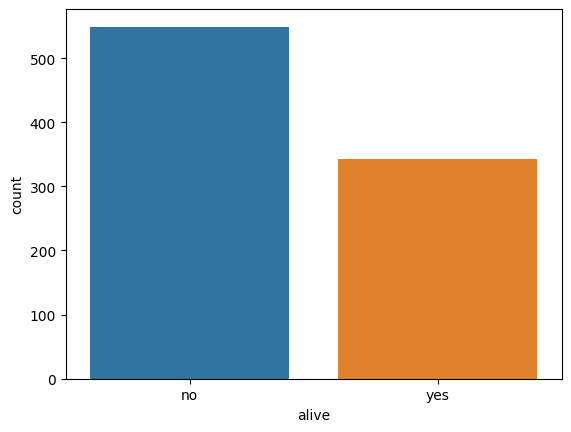

       alone     Ratio
alone                 
1        537  60.26936
0        354  39.73064
############################################################


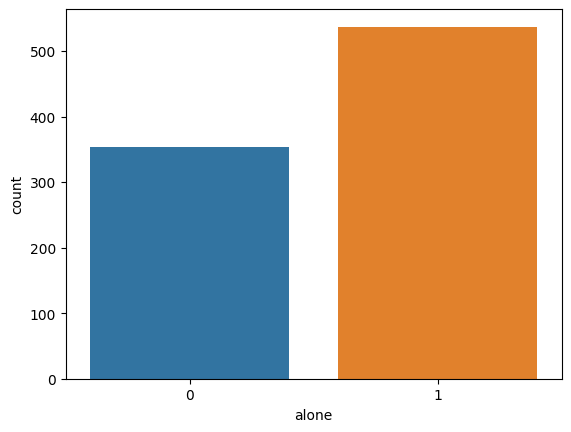

In [44]:
for col in cat_cols:
    if df[col].dtypes =="bool":
        df[col] = df[col].astype(int)
        cat_summary(df, col, plot=True)
    else:
        cat_summary(df, col, plot=True) 